In [1]:
# a. import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create list of unique tickers for Dow Jones, S&P 500, NASDAQ and Nikkei
tickers = ['^DJI', '^GSPC', '^IXIC', '^N225']
min_date = '2018-01-12'
max_date = pd.to_datetime('today')

# download stock data
stock_df = yf.download(tickers, start=min_date, end=max_date, progress=True)
dow = yf.download('^DJI', end=max_date, progress=True)

# create dataframes for close prices
stock_df_close = stock_df['Adj Close']
dow_close = dow['Adj Close']

# convert index to datetime
stock_df_close.index = pd.to_datetime(stock_df_close.index)
dow_close.index = pd.to_datetime(dow_close.index)

# rename columns to match ticker names
stock_df_close.columns = ['Dow Jones', 'S&P 500', 'NASDAQ', 'Nikkei']

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


# Problem 1

## a)

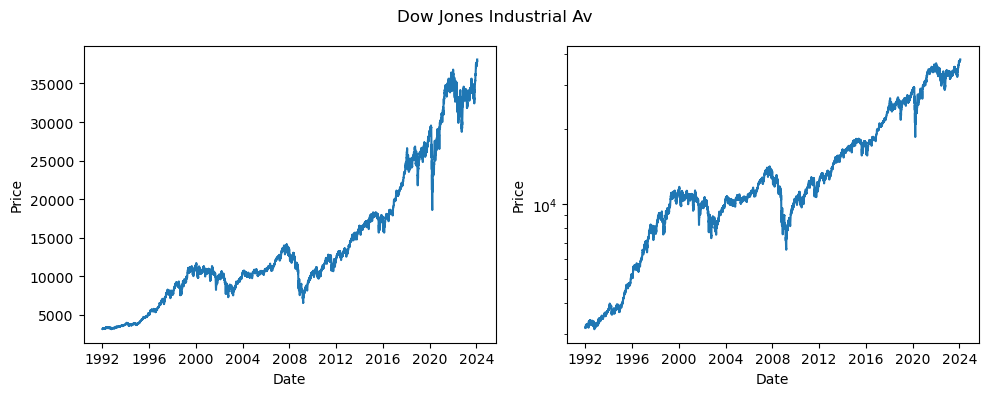

In [4]:
plt.figure(figsize=(10, 4))  # Adjust the figure size to accommodate the horizontal layout

# First subplot
plt.subplot(1, 2, 1)  # Change to 1 row, 2 columns, first plot
plt.plot(dow_close)
plt.xlabel('Date')
plt.ylabel('Price')

# Second subplot
plt.subplot(1, 2, 2)  # Change to 1 row, 2 columns, second plot
plt.plot(dow_close)
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Price')

plt.suptitle('Dow Jones Industrial Av')  # Set the title for the entire figure
plt.savefig('dow.png')
plt.tight_layout()  # Add this to ensure the subplots do not overlap

## b)

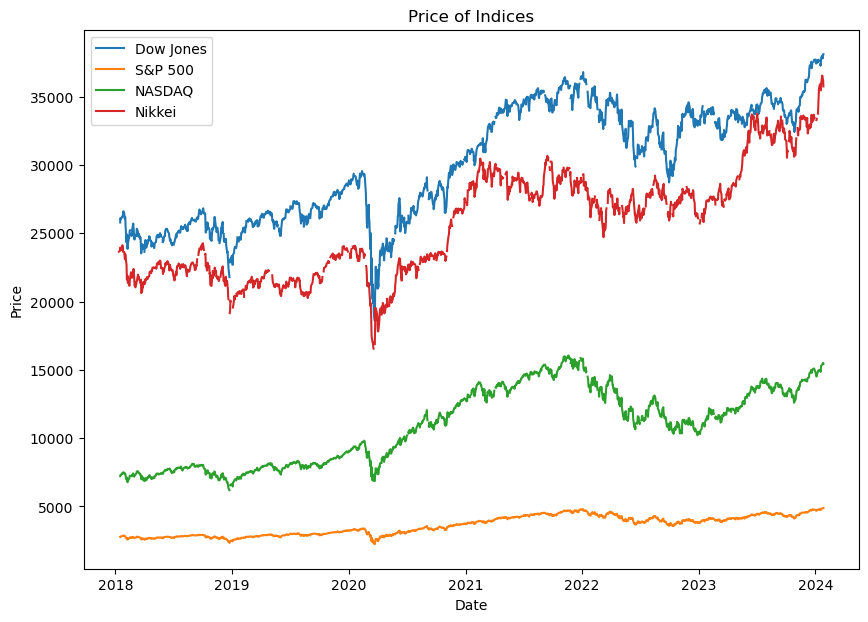

In [6]:
# plot the data
plt.figure(figsize=(10, 7))
plt.plot(stock_df_close)
plt.title('Price of Indices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stock_df_close.columns)
plt.savefig('stocks.png')
plt.show()


In [ ]:
# create new df with only dates 1/12/2018, 1/11/2019, 1/13/2020, 1/13/2021, 1/13/2022, and 1/13/2023
stock_df_close_dates = stock_df_close.loc[['2018-01-12', '2019-01-11', '2020-01-13', '2021-01-13', '2022-01-13', '2023-01-13']]

# calculate yearly returns
stock_df_close_dates.pct_change()

# calculate average yearly returns using geometric mean and arethmetic mean
stock_df_close_dates.pct_change().mean()
stock_df_close_dates.pct_change().apply(lambda x: np.prod(1+x)**(252/len(x))-1)

Dow Jones    1.561189e+05
S&P 500      3.904738e+06
NASDAQ       5.096665e+07
Nikkei       6.336998e+01
dtype: float64

In [ ]:

dates = ['2018-01-12', '2019-01-11', '2020-01-13', '2021-01-13', '2022-01-13', '2023-01-13']
selected_data = stock_df_close.loc[dates]

# Calculate the yearly returns
selected_data = selected_data.pct_change()


In [ ]:
selected_data

,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
2018-01-12,NaN,NaN,NaN,NaN
2019-01-11,-0.070039,-0.068185,-0.039881,-0.139264
2020-01-13,0.204664,0.266487,0.330267,0.000000
2021-01-13,0.074495,0.158665,0.415684,0.397692
2022-01-13,0.162688,0.222894,0.127798,0.001144
2023-01-13,-0.050148,-0.141647,-0.251752,-0.083176
